# Part I - (PROSPER LOAN DATA EXPLORATION)
## by (IKENGWA MAXIMUS)

## Introduction
> A loan is money borrowed from a bank or financial institution. The borrower agrees to pay back the principal amount of the loan plus interest. There are several types of loans, including car loans, student loans, and home mortgages.  

> This project will focus on exploring one the the America's leading lending platforms; **The Prosper Loan Data.** This dataset contains 113,937 loans with 81 variables on each loan,  including loan amount, borrower rate (or interest rate), current loan  status, borrower income, borrower employment status, borrower credit  history, and the latest payment information. We will be looking into the factors that makes people want to take loan and also factions that makes loan applications succesful.

## Table of Contents
---
- [Introduction](#Introduction)
- [Importing Libraries](#Importing-Libraries)
- [Preliminary Wrangling](#Preliminary-Wrangling)
- [Data Assessment](#Data-Assessment)
- [Data Cleaning](#Data-Cleaning)
- [Gathering Additional Data](#Gathering-Additional-Data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Univariate Exploration](#A.-Univariate-Exploration)
    - [Bivariate Exploration](#B.-Bivariate-Exploration)
    - [Multivariate Exploration](#C.-Multivariate-Exploration)
- [Conclusion](#Conclusion)
- [Limitations](#Limitations)
- [Recommendations](#Recommendations)


## Importing Libraries

In [1]:
# Here are the pakages that will be helpful in this data exploration
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Preliminary Wrangling

> here we will laod the data with panadas here, then try and explore the features inherent in the dataset.  we will be namimg our Dataset `LoanData` for this part of the Analysis

In [84]:
# Load the data
LoanData = pd.read_csv('prosperLoanData .csv')
LoanData.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### The Data Structure

> The dataset contains **113,937** loans with **81** features which includes but not limited to the following; LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and many others.it also has more than 50% of the columns containing numerical data

### Main Interest in The Data

>The Dataset contains many interesting features. However, what we want to achieve with this exploration is to understand the different factors that motivates the borrower during Loan applications, the factors that makes loan applications favorable. Hence, we will direct our exploratory analysis towards the following features:

>- **ListingCreationDate:** The date the listing was created.

>- **ListingCategory (numeric):** The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.

>- **BorrowerState:** The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.  

>- **BorrowerAPR:** The Borrower's Annual Percentage Rate (APR) for the loan.  

>- **BorrowerRate:** The Borrower's interest rate for this loan.  

>- **LenderYield:** The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

>- **EmploymentStatus:** The employment status of the borrower at the time they posted the listing.

>- **IncomeRange:** The income range of the borrower at the time the listing was created.

>- **IncomeVerifiable:** The borrower indicated they have the required documentation to support their income.


>- **StatedMonthlyIncome:** The monthly income the borrower stated at the time the listing was created.

>- **isBorrowerHomeowner:** A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.


>- **ProsperRating (Alpha):** The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.

>- **Term:** The length of the loan expressed in months.


>- **LoanOriginalAmount:** The origination amount of the loan.  

>- **DebtToIncomeRatio:** The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).  

>- **LoanStatus:** The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.  

> Ww will be looking at how borrowers' stated monthly income, loan term, Prosper rating, employment status will also have effects on the APR.



## Data Assessment  

> We will be putting up a new dataframe based on the list of interest we have provided earlier.

In [3]:
# creating the new dataframe
cols = ['ListingCreationDate', 'ListingCategory (numeric)', 'BorrowerState','BorrowerRate','LenderYield','BorrowerAPR','EmploymentStatus','IncomeRange', 'IncomeVerifiable','StatedMonthlyIncome', 'IsBorrowerHomeowner',
                'ProsperRating (Alpha)','Term','DebtToIncomeRatio','LoanOriginalAmount','LoanStatus']
Loan = LoanData[cols]

In [4]:
Loan.head()

,ListingCreationDate,ListingCategory (numeric),BorrowerState,BorrowerRate,LenderYield,BorrowerAPR,EmploymentStatus,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,IsBorrowerHomeowner,ProsperRating (Alpha),Term,DebtToIncomeRatio,LoanOriginalAmount,LoanStatus
0,2007-08-26 19:09:29.263000000,0,CO,0.1580,0.1380,0.16516,Self-employed,"$25,000-49,999",True,3083.333333,True,NaN,36,0.17,9425,Completed
1,2014-02-27 08:28:07.900000000,2,CO,0.0920,0.0820,0.12016,Employed,"$50,000-74,999",True,6125.000000,False,A,36,0.18,10000,Current
2,2007-01-05 15:00:47.090000000,0,GA,0.2750,0.2400,0.28269,Not available,Not displayed,True,2083.333333,False,NaN,36,0.06,3001,Completed
3,2012-10-22 11:02:35.010000000,16,GA,0.0974,0.0874,0.12528,Employed,"$25,000-49,999",True,2875.000000,True,A,36,0.15,10000,Current
4,2013-09-14 18:38:39.097000000,2,MN,0.2085,0.1985,0.24614,Employed,"$100,000+",True,9583.333333,True,D,36,0.26,15000,Current


In [5]:
# lets get the Statistical analysis of the dataframe
Loan.describe()

,ListingCategory (numeric),BorrowerRate,LenderYield,BorrowerAPR,StatedMonthlyIncome,Term,DebtToIncomeRatio,LoanOriginalAmount
count,113937.000000,113937.000000,113937.000000,113912.000000,1.139370e+05,113937.000000,105383.000000,113937.00000
mean,2.774209,0.192764,0.182701,0.218828,5.608026e+03,40.830248,0.275947,8337.01385
std,3.996797,0.074818,0.074516,0.080364,7.478497e+03,10.436212,0.551759,6245.80058
min,0.000000,0.000000,-0.010000,0.006530,0.000000e+00,12.000000,0.000000,1000.00000
25%,1.000000,0.134000,0.124200,0.156290,3.200333e+03,36.000000,0.140000,4000.00000
50%,1.000000,0.184000,0.173000,0.209760,4.666667e+03,36.000000,0.220000,6500.00000
75%,3.000000,0.250000,0.240000,0.283810,6.825000e+03,36.000000,0.320000,12000.00000
max,20.000000,0.497500,0.492500,0.512290,1.750003e+06,60.000000,10.010000,35000.00000


In [7]:
#Getting the main information in this dataset
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   BorrowerState              108422 non-null  object 
 3   BorrowerRate               113937 non-null  float64
 4   LenderYield                113937 non-null  float64
 5   BorrowerAPR                113912 non-null  float64
 6   EmploymentStatus           111682 non-null  object 
 7   IncomeRange                113937 non-null  object 
 8   IncomeVerifiable           113937 non-null  bool   
 9   StatedMonthlyIncome        113937 non-null  float64
 10  IsBorrowerHomeowner        113937 non-null  bool   
 11  ProsperRating (Alpha)      84853 non-null   object 
 12  Term                       113937 non-null  int64  
 13  DebtToIncomeRatio          10

In [8]:
#checking for duplicates in the dataframe
Loan.duplicated().sum()

871

> there are 871 duplicates in this dataframe

In [9]:
#checcking for NaN Values
Loan.isna()

,ListingCreationDate,ListingCategory (numeric),BorrowerState,BorrowerRate,LenderYield,BorrowerAPR,EmploymentStatus,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,IsBorrowerHomeowner,ProsperRating (Alpha),Term,DebtToIncomeRatio,LoanOriginalAmount,LoanStatus
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113933,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113934,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113935,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Data Assessment Summary
> In the assesment of the above dataframe, the following were observed:  

> 1. There are 871 duplicate records in the dataset.
> 2. I will want to make the names of the columns: `ListingCategory (numeric)` and `ProsperRating (Alpha)` very simple.
> 3. `ListingCreationDate` is stored with the wrong datatype. It should be in  datetime.
> 4. The numeric information in `ListingCategory (numeric)` could be better explored to reflect the actual reasons for the loan.
> 5.  in `IncomeRange`; there are _Not employed_ entries, they  could be safely replaced with _0_.
> 6. `BorrowerAPR` , `ProsperRating (Alpha)` and `DebtToIncomeRatio` columns contain null values.
> 7. `ProsperRating`, `EmploymentStatus` and `IncomeRange` are ordinal categorical variables and should be stored in ordered form.
> 8. The values in the  `BorrowerState`  are stored with state abbrviations  which will make the data diffucult to read so we will have to import data from an external source to make a better data visualizations.

## Data Cleaning
---
>We will start by creating a copy of the original dataframe, then work on the issues listed above:

## Make a copy of the Original Dataframe

In [10]:
#lets make a copy of the original data
Loan = Loan.copy()

### Drop Duplicates

In [12]:
# Dropping duplicates
Loan = Loan.drop_duplicates()

#Test
Loan.duplicated().sum()

0

### Rename Columns

In [13]:
# Rename the columns
Loan = Loan.rename(columns = {'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})

#Test
Loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingCreationDate  113066 non-null  object 
 1   ListingCategory      113066 non-null  int64  
 2   BorrowerState        107551 non-null  object 
 3   BorrowerRate         113066 non-null  float64
 4   LenderYield          113066 non-null  float64
 5   BorrowerAPR          113041 non-null  float64
 6   EmploymentStatus     110811 non-null  object 
 7   IncomeRange          113066 non-null  object 
 8   IncomeVerifiable     113066 non-null  bool   
 9   StatedMonthlyIncome  113066 non-null  float64
 10  IsBorrowerHomeowner  113066 non-null  bool   
 11  ProsperRating        83982 non-null   object 
 12  Term                 113066 non-null  int64  
 13  DebtToIncomeRatio    104594 non-null  float64
 14  LoanOriginalAmount   113066 non-null  int64  
 15  LoanStatus       

### Change Datatype

In [14]:
#Change datatypes
Loan.ListingCreationDate = pd.to_datetime(Loan.ListingCreationDate)
#Test
Loan['ListingCreationDate'].dtype

dtype('<M8[ns]')

### Use the  right category titles in the ListingCategory column  

> This will be done by replacing the numerical values in the columns with their proper representations

In [169]:
Loan['ListingCategory']

0          0
1          2
2          0
3         16
4          2
          ..
113932     1
113933     7
113934     1
113935     2
113936     1
Name: ListingCategory, Length: 113066, dtype: int64

In [15]:
# Store all the numeric categories and their titles in a dictionary
category_titles = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

# Map the dictionary contents to the ListingCategory column
Loan.ListingCategory = Loan.ListingCategory.map(category_titles)

#Test
Loan.ListingCategory.unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical or Dental', 'Wedding Loans', 'Vacation', 'Business',
       'Taxes', 'Baby & Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

#### 6. Replace `Not employed entries` in IncomeRange with` $0`

In [16]:
Loan.IncomeRange = Loan.IncomeRange.str.replace('Not employed', '$0')

#Test
Loan.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', '$0'], dtype=object)

### Remove Null Values

#### 8. Convert ProsperRating, EmploymentStatus and IncomeRange columns to ordered categorical types

In [17]:
# Store the correct variable orders in a dictionary
order_dict = {'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
              'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', 
                              '$50,000-74,999', '$75,000-99,999', '$100,000+'],
             'EmploymentStatus' :['Employed','Self-employed','Full-time','Part-time',
                                  'Retired','Other','Not employed', 'Not available']}
             
# Assign each column to the proper order
for key, value in order_dict.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    Loan[key] = Loan[key].astype(correct_order)

# Test
Loan[order_dict.keys()].dtypes

ProsperRating       category
IncomeRange         category
EmploymentStatus    category
dtype: object

## Gathering Additional Data
---
As earlier stated; information in the `BorrowerState` column is an abbreviation of the different states in the US, depending on the borrower location. To have a proper visualize and explore this kind of information, we will need to pull data from an external sources.

I found a GitHub user [Rashida048](https://github.com/rashida048), who had already uploaded this information online. We will download [the csv file](https://raw.githubusercontent.com/rashida048/Exploratory-data-Analysis-in-R/main/statelatlong.csv) programatically, using the requests library:

In [18]:
# Programmatically download the csv file
url = 'https://raw.githubusercontent.com/rashida048/Exploratory-data-Analysis-in-R/main/statelatlong.csv'
response = requests.get(url)

with open('state_data.csv', 'wb') as file:
    file.write(response.content)
    
state_names = pd.read_csv('./state_data.csv')
state_names.head(10)

,State,Latitude,Longitude,City
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California
5,CO,38.997934,-105.550567,Colorado
6,CT,41.518783,-72.757507,Connecticut
7,DE,39.145251,-75.418921,Delaware
8,DC,38.899349,-77.014567,District of Columbia
9,FL,27.975728,-83.833017,Florida


> We will merge the two dataframes so as to get a comprehensive data ready for explorations

In [19]:
# Merge Loan and state_names
loan_new = pd.merge(Loan, state_names, left_on='BorrowerState', right_on='State')
loan_new.head(10)

,ListingCreationDate,ListingCategory,BorrowerState,BorrowerRate,LenderYield,BorrowerAPR,EmploymentStatus,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,IsBorrowerHomeowner,ProsperRating,Term,DebtToIncomeRatio,LoanOriginalAmount,LoanStatus,State,Latitude,Longitude,City
0,2007-08-26 19:09:29.263,Not Available,CO,0.1580,0.1380,0.16516,Self-employed,"$25,000-49,999",True,3083.333333,True,NaN,36,0.17,9425,Completed,CO,38.997934,-105.550567,Colorado
1,2014-02-27 08:28:07.900,Home Improvement,CO,0.0920,0.0820,0.12016,Employed,"$50,000-74,999",True,6125.000000,False,A,36,0.18,10000,Current,CO,38.997934,-105.550567,Colorado
2,2010-06-16 16:23:44.533,Debt Consolidation,CO,0.0920,0.0820,0.11296,Full-time,"$75,000-99,999",True,6666.666667,True,A,36,0.26,4000,Completed,CO,38.997934,-105.550567,Colorado
3,2013-05-01 08:18:59.183,Debt Consolidation,CO,0.1299,0.1199,0.15833,Employed,"$50,000-74,999",True,5416.666667,True,A,36,0.35,15000,Current,CO,38.997934,-105.550567,Colorado
4,2011-11-13 20:05:58.260,Other,CO,0.3199,0.3099,0.35643,Employed,"$75,000-99,999",True,6250.000000,True,HR,36,0.23,4000,Completed,CO,38.997934,-105.550567,Colorado
5,2012-04-17 11:58:52.270,Business,CO,0.2287,0.2187,0.26681,Self-employed,"$50,000-74,999",False,5000.000000,True,D,36,NaN,15000,Chargedoff,CO,38.997934,-105.550567,Colorado
6,2008-06-12 11:59:55.217,Other,CO,0.0830,0.0730,0.08641,Full-time,"$50,000-74,999",True,5833.333333,True,NaN,36,0.06,6500,Completed,CO,38.997934,-105.550567,Colorado
7,2014-01-21 17:51:08.917,Debt Consolidation,CO,0.0809,0.0709,0.09434,Employed,"$100,000+",True,10000.000000,True,AA,36,0.14,12000,Current,CO,38.997934,-105.550567,Colorado
8,2008-02-04 00:10:59.960,Debt Consolidation,CO,0.1350,0.1250,0.15651,Full-time,"$1-24,999",True,1583.333333,False,NaN,36,0.26,1000,Completed,CO,38.997934,-105.550567,Colorado
9,2012-06-23 09:04:46.863,Debt Consolidation,CO,0.3177,0.3077,0.35797,Employed,"$25,000-49,999",True,2750.000000,False,HR,36,0.29,4000,Completed,CO,38.997934,-105.550567,Colorado


> We will drop the unwanted columns and then rename the City column to BorrowerState since we are dropping the initial columns with abbrviations only

In [20]:
# Drop unwanted columns
loan_new.drop(columns = ['State','Latitude','Longitude','BorrowerState'], inplace=True)

# Rename city column to BorrowerStates
loan_new= loan_new.rename(columns={'City': 'BorrowerStates'})

In [176]:
loan_new.BorrowerStates.unique()

array(['Colorado', 'Georgia', 'Minnesota', 'New Mexico', 'Kansas',
       'California', 'Illinois', 'Maryland', 'Alabama', 'Arizona',
       'Virginia', 'Florida', 'Pennsylvania', 'Oregon', 'Michigan',
       'New York', 'Louisiana', 'Wisconsin', 'Ohio', 'North Carolina',
       'Washington', 'Nevada', 'New Jersey', 'Texas', 'Arkansas',
       'South Carolina', 'Delaware', 'Missouri', 'Nebraska', 'Utah',
       'District of Columbia', 'Massachusetts', 'Connecticut', 'Indiana',
       'Kentucky', 'Oklahoma', 'Mississippi', 'West Virginia',
       'Rhode Island', 'Tennessee', 'Idaho', 'Montana', 'Hawaii',
       'New Hampshire', 'Vermont', 'Wyoming', 'Maine', 'Alaska', 'Iowa',
       'South Dakota', 'North Dakota'], dtype=object)

In [23]:
loan_new.head(10)

,ListingCreationDate,ListingCategory,BorrowerRate,LenderYield,BorrowerAPR,EmploymentStatus,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,IsBorrowerHomeowner,ProsperRating,Term,DebtToIncomeRatio,LoanOriginalAmount,LoanStatus,BorrowerStates
0,2007-08-26 19:09:29.263,Not Available,0.1580,0.1380,0.16516,Self-employed,"$25,000-49,999",True,3083.333333,True,NaN,36,0.17,9425,Completed,Colorado
1,2014-02-27 08:28:07.900,Home Improvement,0.0920,0.0820,0.12016,Employed,"$50,000-74,999",True,6125.000000,False,A,36,0.18,10000,Current,Colorado
2,2010-06-16 16:23:44.533,Debt Consolidation,0.0920,0.0820,0.11296,Full-time,"$75,000-99,999",True,6666.666667,True,A,36,0.26,4000,Completed,Colorado
3,2013-05-01 08:18:59.183,Debt Consolidation,0.1299,0.1199,0.15833,Employed,"$50,000-74,999",True,5416.666667,True,A,36,0.35,15000,Current,Colorado
4,2011-11-13 20:05:58.260,Other,0.3199,0.3099,0.35643,Employed,"$75,000-99,999",True,6250.000000,True,HR,36,0.23,4000,Completed,Colorado
5,2012-04-17 11:58:52.270,Business,0.2287,0.2187,0.26681,Self-employed,"$50,000-74,999",False,5000.000000,True,D,36,NaN,15000,Chargedoff,Colorado
6,2008-06-12 11:59:55.217,Other,0.0830,0.0730,0.08641,Full-time,"$50,000-74,999",True,5833.333333,True,NaN,36,0.06,6500,Completed,Colorado
7,2014-01-21 17:51:08.917,Debt Consolidation,0.0809,0.0709,0.09434,Employed,"$100,000+",True,10000.000000,True,AA,36,0.14,12000,Current,Colorado
8,2008-02-04 00:10:59.960,Debt Consolidation,0.1350,0.1250,0.15651,Full-time,"$1-24,999",True,1583.333333,False,NaN,36,0.26,1000,Completed,Colorado
9,2012-06-23 09:04:46.863,Debt Consolidation,0.3177,0.3077,0.35797,Employed,"$25,000-49,999",True,2750.000000,False,HR,36,0.29,4000,Completed,Colorado


In [24]:
#lets Re-arrange the columns 
cols = ['ListingCreationDate', 'ListingCategory', 'BorrowerStates','BorrowerRate','BorrowerAPR','LenderYield','EmploymentStatus','IncomeRange', 'IncomeVerifiable','StatedMonthlyIncome', 'IsBorrowerHomeowner',
                'ProsperRating','Term','DebtToIncomeRatio','LoanOriginalAmount','LoanStatus']

Loan_clean = loan_new[cols]

In [100]:
Loan_clean.head(10)

,ListingCreationDate,ListingCategory,BorrowerStates,BorrowerRate,BorrowerAPR,LenderYield,EmploymentStatus,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,IsBorrowerHomeowner,ProsperRating,Term,DebtToIncomeRatio,LoanOriginalAmount,LoanStatus
0,2007-08-26 19:09:29.263,Not Available,Colorado,0.1580,0.16516,0.1380,Self-employed,"$25,000-49,999",True,3083.333333,True,NaN,36,0.17,9425,Completed
1,2014-02-27 08:28:07.900,Home Improvement,Colorado,0.0920,0.12016,0.0820,Employed,"$50,000-74,999",True,6125.000000,False,A,36,0.18,10000,Current
2,2010-06-16 16:23:44.533,Debt Consolidation,Colorado,0.0920,0.11296,0.0820,Full-time,"$75,000-99,999",True,6666.666667,True,A,36,0.26,4000,Completed
3,2013-05-01 08:18:59.183,Debt Consolidation,Colorado,0.1299,0.15833,0.1199,Employed,"$50,000-74,999",True,5416.666667,True,A,36,0.35,15000,Current
4,2011-11-13 20:05:58.260,Other,Colorado,0.3199,0.35643,0.3099,Employed,"$75,000-99,999",True,6250.000000,True,HR,36,0.23,4000,Completed
5,2012-04-17 11:58:52.270,Business,Colorado,0.2287,0.26681,0.2187,Self-employed,"$50,000-74,999",False,5000.000000,True,D,36,NaN,15000,Chargedoff
6,2008-06-12 11:59:55.217,Other,Colorado,0.0830,0.08641,0.0730,Full-time,"$50,000-74,999",True,5833.333333,True,NaN,36,0.06,6500,Completed
7,2014-01-21 17:51:08.917,Debt Consolidation,Colorado,0.0809,0.09434,0.0709,Employed,"$100,000+",True,10000.000000,True,AA,36,0.14,12000,Current
8,2008-02-04 00:10:59.960,Debt Consolidation,Colorado,0.1350,0.15651,0.1250,Full-time,"$1-24,999",True,1583.333333,False,NaN,36,0.26,1000,Completed
9,2012-06-23 09:04:46.863,Debt Consolidation,Colorado,0.3177,0.35797,0.3077,Employed,"$25,000-49,999",True,2750.000000,False,HR,36,0.29,4000,Completed


In [101]:
#Statistical representation of the new dataframe
Loan_clean.describe()

,BorrowerRate,BorrowerAPR,LenderYield,StatedMonthlyIncome,Term,DebtToIncomeRatio,LoanOriginalAmount
count,107551.000000,107551.000000,107551.000000,1.075510e+05,107551.000000,99151.000000,107551.000000
mean,0.193548,0.220409,0.183500,5.648132e+03,41.046313,0.273312,8463.608149
std,0.075273,0.080848,0.075028,7.612584e+03,10.627095,0.510596,6260.333277
min,0.000000,0.006530,-0.010000,0.000000e+00,12.000000,0.000000,1000.000000
25%,0.134600,0.157130,0.124600,3.250000e+03,36.000000,0.150000,4000.000000
50%,0.184000,0.211560,0.174000,4.708333e+03,36.000000,0.220000,6500.000000
75%,0.253700,0.286710,0.242400,6.833333e+03,36.000000,0.320000,12000.000000
max,0.360000,0.423950,0.340000,1.750003e+06,60.000000,10.010000,35000.000000


> Data ia ready for Explorations

## Univariate Exploration

> **Lets start by looking at the main focus here which is the distribution of the `Borrower APR`  
lets see how they are distributed in the dataset**

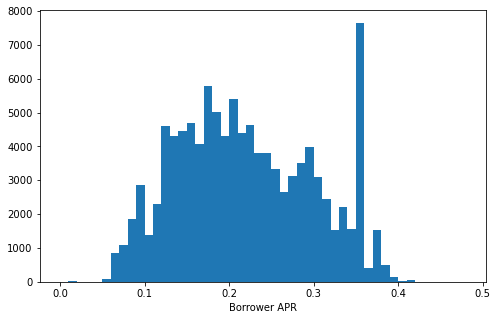

In [102]:
# Set color for all univariate plots
shades = sns.color_palette()[0]

# Create 40 evenly spaced bins for Borrower APR from zero to the maximum value
bins = np.arange(0, Loan_clean.BorrowerAPR.max()+0.06, 0.01)

plt.figure(figsize=(8, 5))
plt.hist(data=Loan_clean, x='BorrowerAPR', bins=bins, color = shades);
plt.xlabel('Borrower APR');

### Observations
> The distribution of Borrowers'APR seems multimodal. we have peaks at `0.09,0.8,0.22,0.3 and 0.35` areas, then a very sharp peac peak at `0.37 area`. The least of the APR comes after `0.43`.

#### Which State has the highest number of borrowers in the listing?

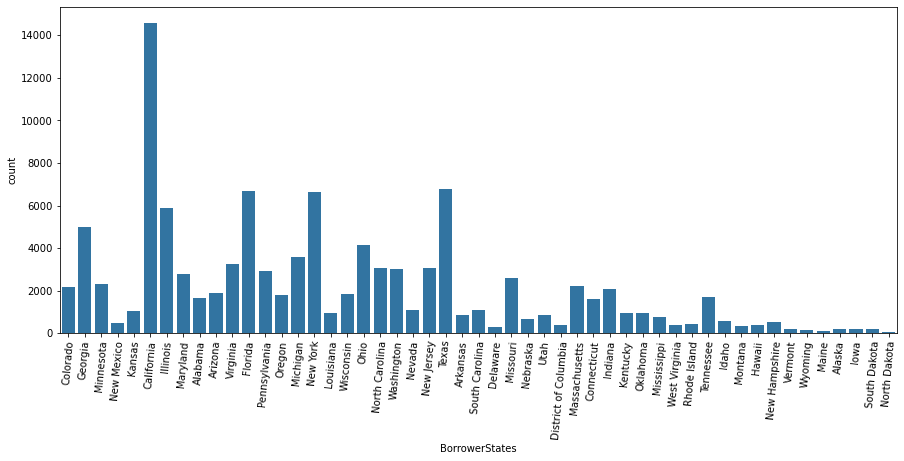

In [103]:
plt.figure(figsize=(15, 6))
shades = sns.color_palette()[0]
sns.countplot(data=Loan_clean, x='BorrowerStates',color = shades)
# Rotate the x-ticks for reading ease
plt.xticks(rotation= 85);

#### Observations
> From the above chart, we can see that California has the highest number of borrowers, with over 8,000 loan listings from borrowers in the state.Prosper Loan Company being stituated in California. There migth be a great considerations for people applying from the home sate: hence the reason they have such number of borrowers. Borrowers from Illinois, New York, Texas and Florida, have also contributed over 4000 listings each.  
> finally we can say that proximity to the company by geographical location affects the success of the loan application

#### How are `Prosper ratings`, `Employment status` and `Listing Categories` distributed in the dataset?

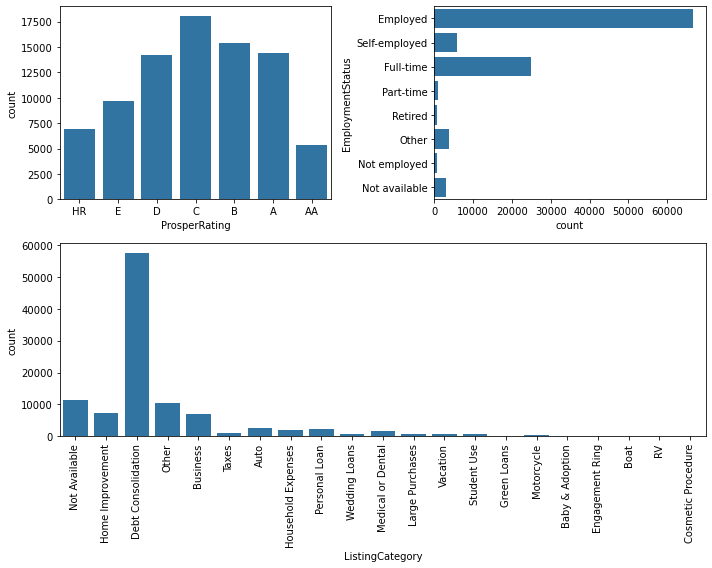

In [104]:
fig = plt.figure(figsize=(10, 8))
# Prosper Ratings
plt.subplot(2,2,1)
sns.countplot(data=Loan_clean, x='ProsperRating', color = shades)

# Employment Status
plt.subplot(2,2,2)
sns.countplot(data=Loan_clean, y='EmploymentStatus', color = shades)

# ListingCategory
# Make last axes occupy the two subplots in the second row
plt.subplot(2,1,2)
sns.countplot(data=Loan_clean, x='ListingCategory', color = shades)
plt.xticks(rotation=90)
plt.tight_layout();

#### Observations
>- The distribution of `Prosper Ratings` is a one mode distribution, with the most common rating belonging to the central grade represented (**C**), has the highest ratings, followed by (**B**) and then (**A**). (**AA**) are the least common.

>- The Chart in the  `Employment status` shows that the majority of the borroers are of the employed class. This is very interesting, considering how difficult it would be to obtain a loan without a job.  

>- In the `Listing Category`, it appears that people seek loans from the platform, in order to payoff Debts. These group of people greatly exceeds those that seek loans for many expected reasons like Business, Home improvement, Auto related and Medical reasons. it also looks like people hardly take loan for cosmetic procedure, buying engagement rings Rv and others

### Lets look at the distribbution of the `Borrower Rate`

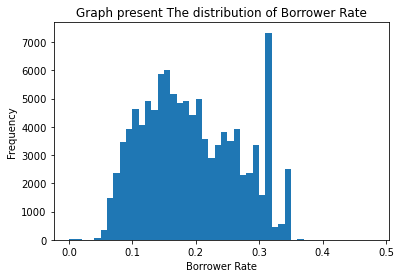

In [105]:
#for the Borrower Rates
plt.hist(data=Loan_clean, x='BorrowerRate', bins=bins, color = shades);
plt.xlabel("Borrower Rate")
plt.ylabel("Frequency")
plt.title("Graph present The distribution of Borrower Rate");



> The data is normaly distrubuted and it has peaks is between 0.15, 0.2,0.33 and 0.35

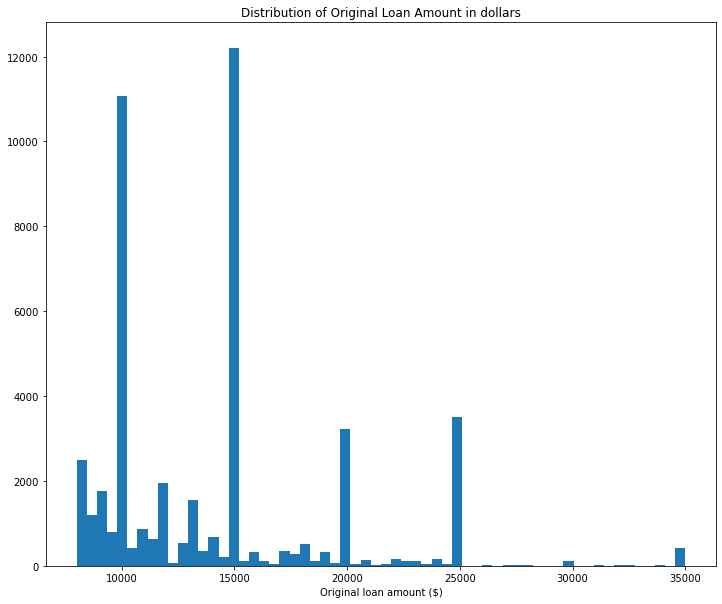

In [118]:
# Distribution of LoanOriginalAmount
bins = np.arange(8000, Loan_clean.LoanOriginalAmount.max()+400, 450)
plt.figure(figsize=[12, 10])
plt.hist(data = Loan_clean, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');
plt.title('Distribution of Original Loan Amount in dollars');

>The higheest amount of Loan being taken from this sample frequently are  15,000 followed by 10,000,25,000 and then 20.000(dollars). The visualization also shows that people take smaller amounts more often that big amount of money from the compnay.

## Bivariate Exploration


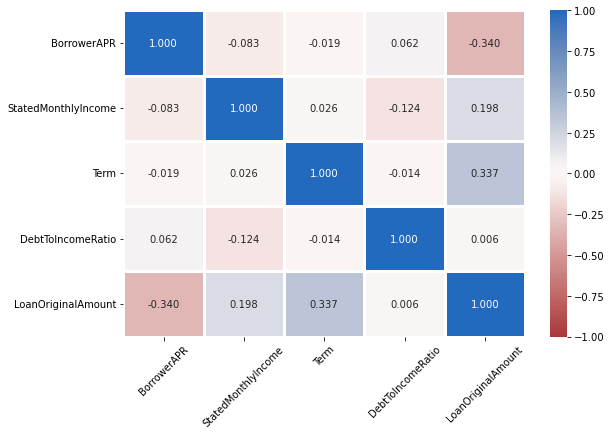

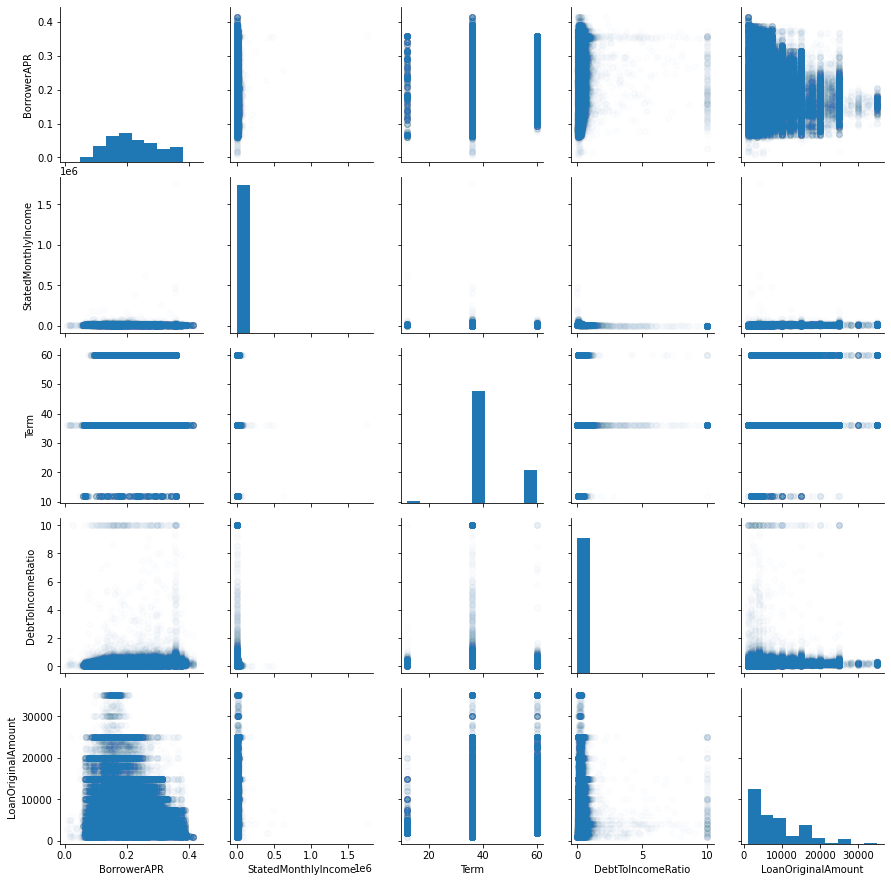

In [234]:
# Store numeric column names in a list
num_vars = ['BorrowerAPR', 'StatedMonthlyIncome','Term', 'DebtToIncomeRatio', 'LoanOriginalAmount']

# Visualize the correlation between the numeric variables with a heatmap
plt.figure(figsize= (9, 
sns.heatmap(Loan_clean[num_vars].corr(), annot=True, fmt='.3f', 
            cmap='vlag_r', vmin=-1, vmax=1, linewidth=3)
plt.xticks(rotation=45);

# Create a scatterplot of each numeric variable against the other
fig = sns.PairGrid(Loan_clean[num_vars])
fig.map_diag(plt.hist, color = shades)
fig.map_offdiag(plt.scatter,color = shades, alpha=0.01);

### Observations  

>- There are two major observations here. first is the  negetative corrolation between  (-0.430) between loan original amount and Borrower APR. This could mean that the higher the loan you take, the lesser the yearly percentage interest rate and the lesser loan the higher APR.  

>- Also there is a positive  positive correlation (0.377)  between the `loan Term` and `LoanOriginalAmount`. then `StatedmonthlyIncome` and `LoanOriginalAmount`(0.198)This makes some sense, since borrowers may need longer terms to fully repay higher loan amounts.
There are no notable relationships between the other numeric variables at the moment.   

> Lets look closely at the two opposite corrolations  ..

### A closer look on the relationship between `LoanOriginalAmount and BorrowerAPR`  



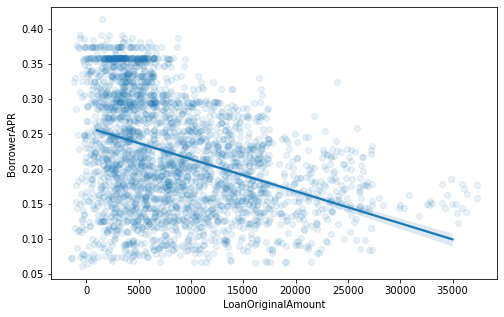

In [57]:
#OriginalLoanAmount vs BorowersAPR with a sample size of 3000 loans from diffeent states selected at random
plt.figure(figsize=(8, 5))
sns.regplot(data=Loan_clean.sample(3000, random_state=1), x='LoanOriginalAmount', y='BorrowerAPR', 
            x_jitter=2500, color = shades, scatter_kws={'alpha': 0.1});

> > Here we can see clearly that we could see that the higher Loan amount has the lowest APR. this is because , taking higher loan has always been more profitable to lesser amount. this might also be a strategy from the Loan company to get people to take higher loan amounts

### A closer look on the relationship between `StatedMonthlyIncome and BorrowerAPR`  


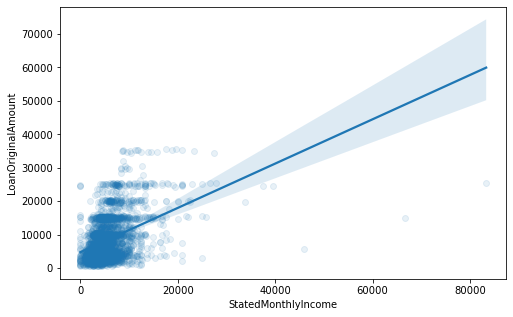

In [56]:
# we will also use the same saample size (300) for consistency 
plt.figure(figsize=(8, 5))
sns.regplot(data=Loan_clean.sample(3000, random_state=1), x='StatedMonthlyIncome', y='LoanOriginalAmount', 
            x_jitter=4, color= shades, y_jitter=500,scatter_kws={'alpha': 0.1});

> The perfect Analogy to this visualization is " the Higher you earn the higher loan you take". We also see here that low income earners took more loan that the higher income earners

### The Relationship between `ProsperRating` and `Term`

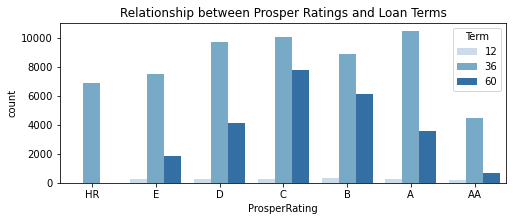

In [96]:
plt.figure(figsize = [8, 10])

# subplot 1: Prosper rating vs term
plt.subplot(3, 1, 1)
sns.countplot(data = Loan_clean, x = 'ProsperRating', hue = 'Term', palette = 'Blues');
plt.title('Relationship between Prosper Ratings and Loan Terms');

> From the above  visualization, Most people took the 36 months loan term, followed by the 6oth month, few people took the 12 month. i will really like to know the income and employment statues of these distribution to clearly reason why people choose 36 months over 60 months. May be people just want to be moderate in their loan terms." payoff your loan and take another one"

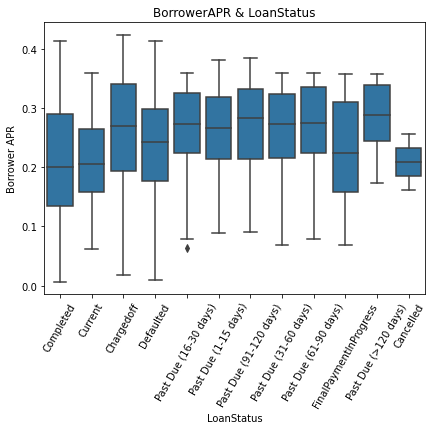

In [95]:
# Borrower APR vs Status of Loan and  Borrower APR vs Employment status
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sns.boxplot(data=Loan_clean,x='LoanStatus',y='BorrowerAPR',color=shades);
plt.xlabel('LoanStatus');
plt.ylabel('Borrower APR');
plt.title('BorrowerAPR & LoanStatus');
plt.xticks(rotation=60);


### Observations

>- The median borrower APR of current, completed and Final payment in process are the lowest, with few low outliers of APR rate in charged off. Whereas charged off loans and defaulted are with the highest median of borrower rate.


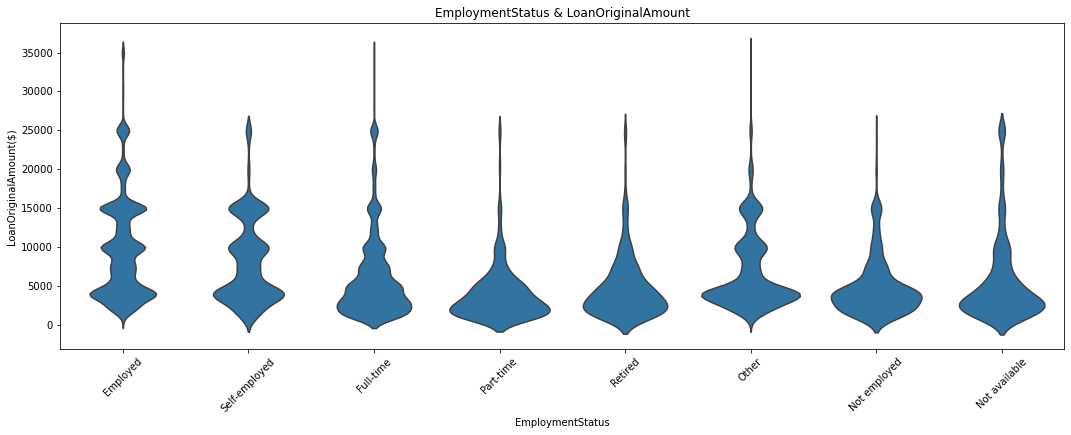

In [97]:
plt.figure(figsize = [18, 6])

sns.violinplot(data=Loan_clean, x='EmploymentStatus', y='LoanOriginalAmount', color=shades, inner=None)
plt.xlabel('EmploymentStatus')
plt.ylabel('LoanOriginalAmount($)');
plt.title('EmploymentStatus & LoanOriginalAmount');
plt.xticks(rotation=45);

### Observations  

> From the visualizatoon above, major bulk of the loan amount taken were  between 3.000 dollars to 5.000 dollars, The `Parttime`, `Not Employed`, `Retired` didnt really take much higher amount of Loan, possibly becaus eof their low and unsteady incomes, while the `Employed`, `Self Employed, `Fulltime`` took some more loans of higher amount. and possibly due to their steady income 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Lets look at the interaction between `BorrowerAPR` and `LoanOriginalAmount` using `Prosper rating`

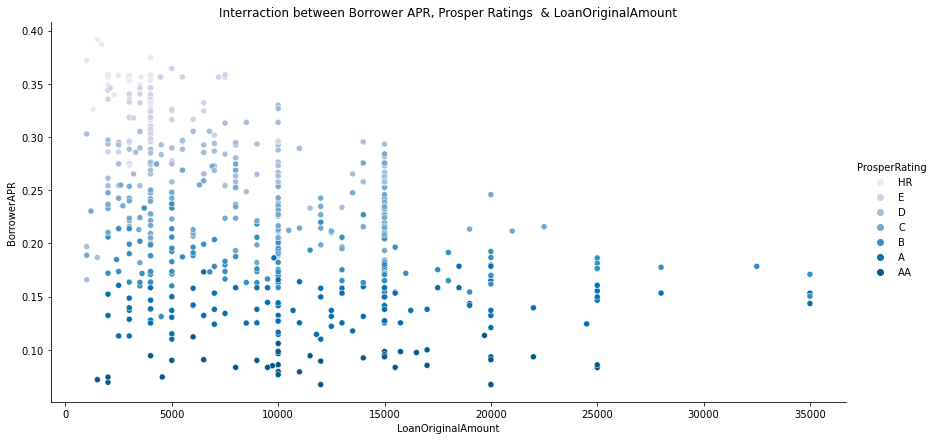

In [98]:
# Visualize interactions with a seaborn relplot
sns.relplot(data=Loan_clean.sample(800, random_state=1), y='BorrowerAPR', x='LoanOriginalAmount', 
            hue='ProsperRating', palette='PuBu', height=6, aspect=2);
plt.title('Interraction between Borrower APR, Prosper Ratings  & LoanOriginalAmount');

> The relationship between the three variables is clear t. People with low prosper ratings take smaller loans at higher percentage rates, while those with higher prosper ratings enjoy higher loan amounts at lower rates.

 ### What is the relationship between `ProsperRating, LoanOriginalAmount, loan Term, and DebtToIncomeRatio`. Do highly-rated borrowers tend to take huge loans as the loan term increases, and does this influence their debt-to-income ratio and `Borrower APR `

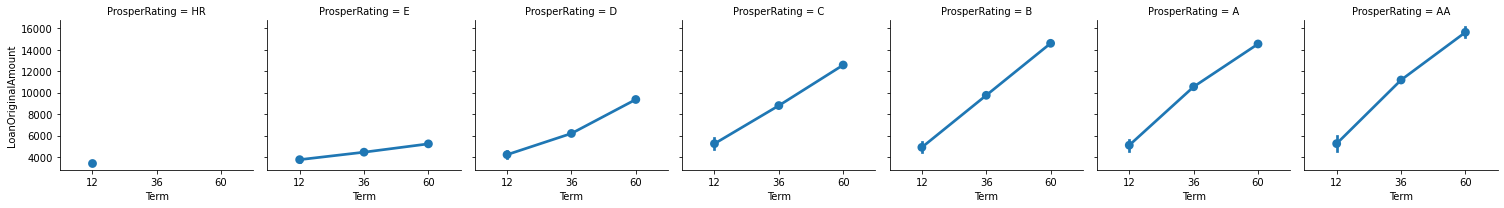

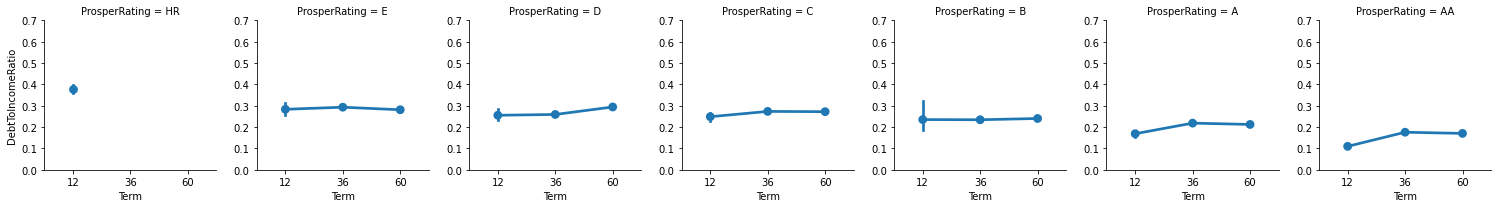

In [75]:
# ploting the visuals
fig = sns.FacetGrid(data=Loan_clean, col='ProsperRating')
fig.map(sns.pointplot, 'Term', 'LoanOriginalAmount', order=None);


fig = sns.FacetGrid(data=Loan_clean, col='ProsperRating', sharey=False)
fig.map(sns.pointplot, 'Term', 'DebtToIncomeRatio', order=None)
# Limit y-axis for all facets from 0 to 0.7
for ax in fig.axes:
    for i in range(7):
        ax[i].set_ylim(0, 0.7)

### Observations

>- It seems that individuals with high `prosper ratings` tend to greatly increase their loan amounts once they have longer payback periods. This can be seen from the rising slope of the lines from the first to the last facet.  

> Also we can see that  `debt-to-income ratio` decreases with `posper ratings`, the slope of the connecting plot lines tell us an interesting story: The top rated borrowers `A and AA` notably increase their debt-to-income ratios when higher payback periods are involved, especially for 36months -term loans.


> **Let's use these notes to create three simple and informative pointplots that shows and connects the trends we have observed between LoanOriginalAmount, DebtToIncomeRatio, BorrowerAPR and ProsperRating altogether.**

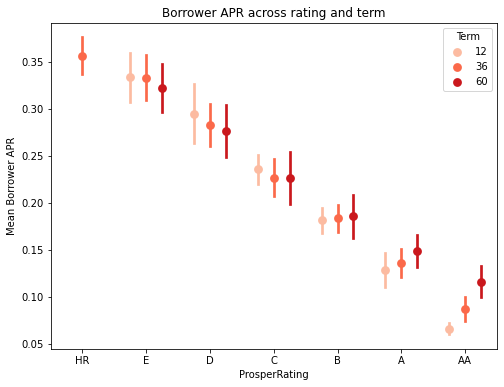

In [147]:
# for Prosper Rating, Borrower APR and  LoanTerm
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = Loan_clean, x = 'ProsperRating', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Reds', linestyles = '', dodge = 0.5, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

> the borrower APR decrease with the increase of borrow term for people with HR-C raings. excpet for the group with B-AA ratings, the APR increase with the increase of borrow term.

### The interation between Prosper Ratings, Loan Original Amount and Loan Term

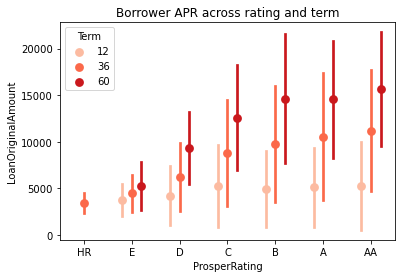

In [146]:
ax = sns.pointplot(data = Loan_clean, x = 'ProsperRating', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Reds', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('LoanOriginalAmount');

> This very progressive and positive interaction... while the HR with the lowest startup loam amount  group only operated on 36months term,  other groups utizedd their 3 different terms with an increased original loan amount  

### The interation between Prosper Ratings, Stated Monthly Icome and Loan Term

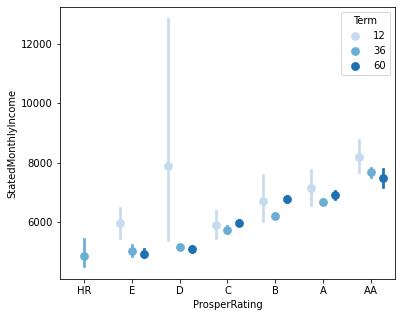

In [145]:
# for Rating and Loan Term effect on Stated monly income
fig = plt.figure(figsize = [6,5])
sns.pointplot(data = Loan_clean, x = 'ProsperRating', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.5);


### Observations  

> in the above visualization  it doesn't seem like there is a interaction effect between term and rating, the pattern of term is similar among different ratings from **C** to **A** while all others react differently

### What is the relationship between LoanOriginalAmount, ProsperRating and IsBorrowerHomeowner. Do homeowners enjoy higher loans accross board than their counterparts?

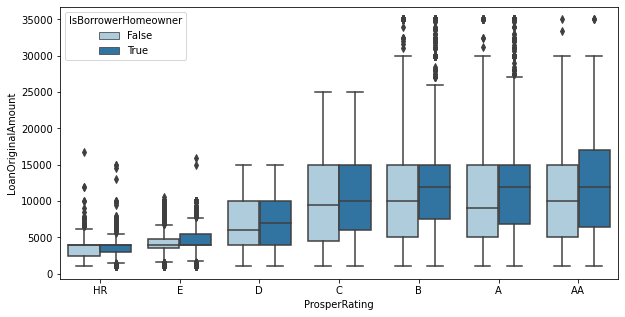

In [78]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=Loan_clean, x='ProsperRating', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', palette='Paired');

> Across all prosper ratings, homeowners were granted higher loan amounts on average than their counterparts. In addition to other factors, having a home is a good consideration when higher loan amounts are involved because it can serve as collateral.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Trying to find out more from the borrower APR against loan amount by looking at the impact of the Prosper rating. The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. I then i also looked at the  the rating and term effects on The different Loan amounts, i found that with  that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

### Were there any interesting or surprising interactions between features?

> Some of the surprising interaction from the MUltivariate Eploration is that the borrower APR and loan amount is negatively correlated when the Prosper ratings are coming from HR to B, but the correlation is turned to be positive when the ratings are A and AA. Another interesting thing is that the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the borrow term.

## Conclusions 

>This Prosper loan data explorations was aimed at the motivations accross different borrowers when applying for loan, and also the different factors that maay affect the Success of a Loan application.

>In terms of borrower motivations, we found surprising results. Rather than take loans to start businesses or purchase assets, the largest population seems to take large amount of Loans t finance weddings, child adoptions, boat acquisitions, and the purchase of engagement rings; THis are things that oridinarily doesnt have any return on investment, hence money spent on them can not be recovered. This explains the reason, we have Many people taking Loans just to finance their debts. Debt consolidation also accounts for the highest loan amounts collected from the platform on average. While all these may point to possibly self indulgent reasons, it can also be the liefstyle of the people living in that Region

>We also measured loan favorability using the annual percentage rate attached to a loan (the Borrower APR). we found out that the sucess of most Loan application is influenced positively by high and verifiable incomes, homeownership, low debt to income ratio, and the presence of a current means of employmenWe ,Also Borrower APR is negatively correlated with the loan original amount, loan term, and prosper rating( these are only detailed informations needed while filling out an application form not an asset that might  be considered as collateral).

>On further exploration, another surprising interaction was discovered. There seemed to be a dichotomy in the interaction between borrower APR and prosper ratings. Between the lower ratings of HR to B, borrower APR and prosper ratings were negatively correlated. This interaction turns positive within the high prosper rating group (B to AA). We attributed this to the possible influence of lurking variables, such as the loan term, and borrowing power of high income earners who are usually rated higher on the prosper scale. High income earners seemed to borrow more when long-term loans are involved, increasing their debt to income ratio. Hence, an increase in APR might be a great way to disincentivize 'overborrowing'. On the other hand, decreasing APR by term might be a great way to encourage low-rated borrowers to take long-term loans; giving them enough time to repay their loan.
